In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline 

# Analysis Tasks to be performed:

### 1. Import a 311 NYC service request.

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv') #  creating a datafram for csv file

C:\Users\SHWETA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head() # display top 5 rows

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape # display the number of rows and columns

(300698, 53)

In [5]:
df.columns # dispaly the feature names

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
df.info() # columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

In [7]:
df.isnull().sum() # Null check

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [8]:
df['Created Date'].dtype  # checking the datatype of Created Date feature

dtype('O')

In [9]:
df['Closed Date'].dtype # checking the datatype of Closed Date feature

dtype('O')

In [10]:
df['Created Date'] = pd.to_datetime(df['Created Date']) # changing the datatype of Created Date feature to DateTime

In [11]:
df['Created Date'].dtype 

dtype('<M8[ns]')

In [12]:
df['Closed Date'] = pd.to_datetime(df['Closed Date']) # changing the datatype of Created Date feature to DateTime

In [13]:
df['Closed Date'].dtype

dtype('<M8[ns]')

In [14]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date'] #creating new feature 'Request_Closing_Time' as mentioned in question

In [15]:
df['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300693        NaT
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [16]:
# Function to convert TimeDelta in Hour

def to_Hr(timeDelta):
    days = timeDelta.days
    hours = round(timeDelta.seconds/3600, 2)
    result = (days * 24) + hours
    return result
    

In [17]:
df['Request_Closing_In_Hr'] = df['Request_Closing_Time'].apply(to_Hr)

In [18]:
df['Request_Closing_In_Hr']

0         0.92
1         1.44
2         4.86
3         7.75
4         3.45
          ... 
300693     NaN
300694    2.01
300695    3.12
300696    4.09
300697    4.15
Name: Request_Closing_In_Hr, Length: 300698, dtype: float64

### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [19]:
# Function to categorize the completion time of a complaint - (Less than 2 hours as Fast),(Between 2 to 4 hours - Acceptable), (Between 4 to 6 - Slow), (More than 6 hours - Very Slow)
def Category(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [20]:
df['Request_Closing_Time_Category'] = df['Request_Closing_In_Hr'].apply(Category)

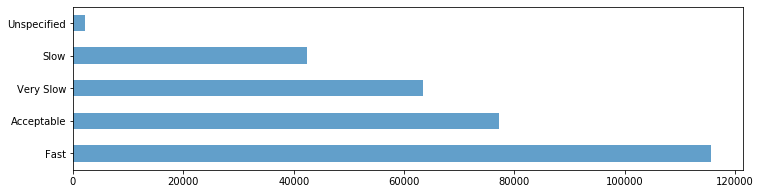

In [21]:
# Insight 1 -----> Create Bar plot for Request_Closing_Time_Category to check frequency in Request_Closing_Time_Category and it prove Most count is in Fast category means closed less than 2 hours

df['Request_Closing_Time_Category'].value_counts().plot(kind="barh", alpha=0.7, figsize=(12,3))
plt.show()


#### 3.1 Most of the compalints are solved within two hours

In [22]:
# Insight 2 ------> To check in which month the most of the complaints are created.

# Created Series for months in text format
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})


In [23]:

# Function to fetch month from Created Date column

def getMonth(Date):
    Date= str(Date)
    Date = datetime.datetime.strptime(Date, "%Y-%m-%d %H:%M:%S")
    Month=Date.month
    return monthSeries[Month]


In [24]:
df['Created_Month'] = df['Created Date'].apply(getMonth)

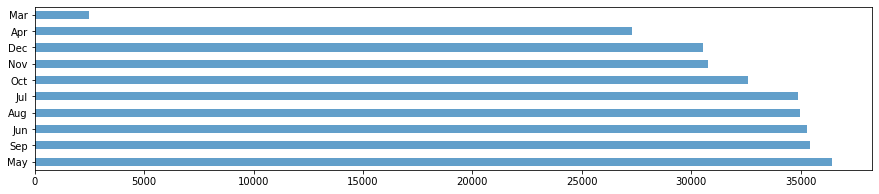

In [25]:
# Create Bar plot for Complain Created Month to check frequency and it prove Most count is in May month and least is in March and in January there is no any complain
df['Created_Month'].value_counts().plot(kind="barh",alpha=0.7, figsize=(15,3))
plt.show()

#### 3.2 May Month has most of the compalints registered but september , june , august ,july , october also has more number of cases. 

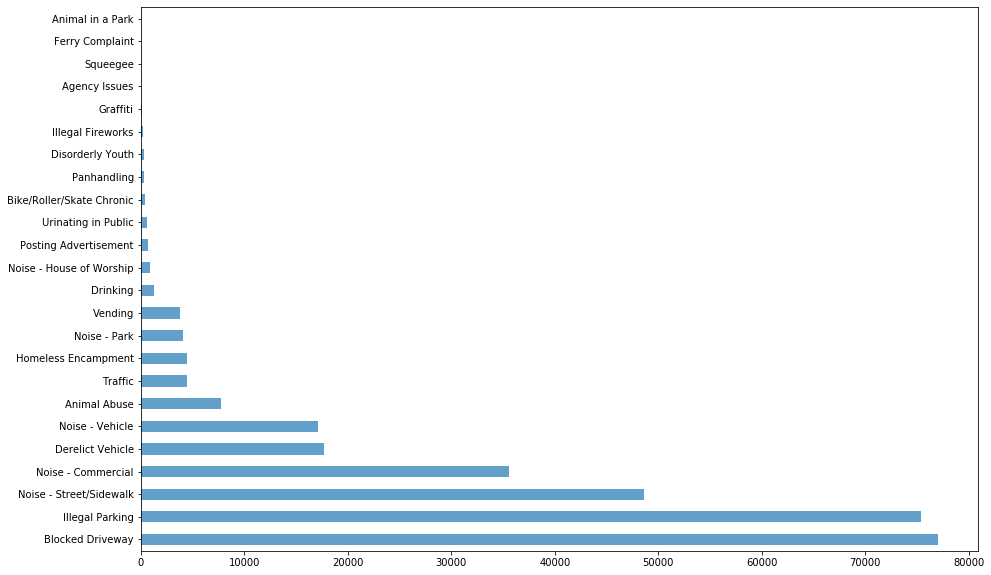

In [26]:
# Insight 3 ------> # Create Bar plot for complain type to check frequency in Complain Type

df['Complaint Type'].value_counts().plot(kind="barh", alpha=0.7, figsize=(15,10))
plt.show()

#### 3.3 Blocked Driveway is the most common type of  complain type

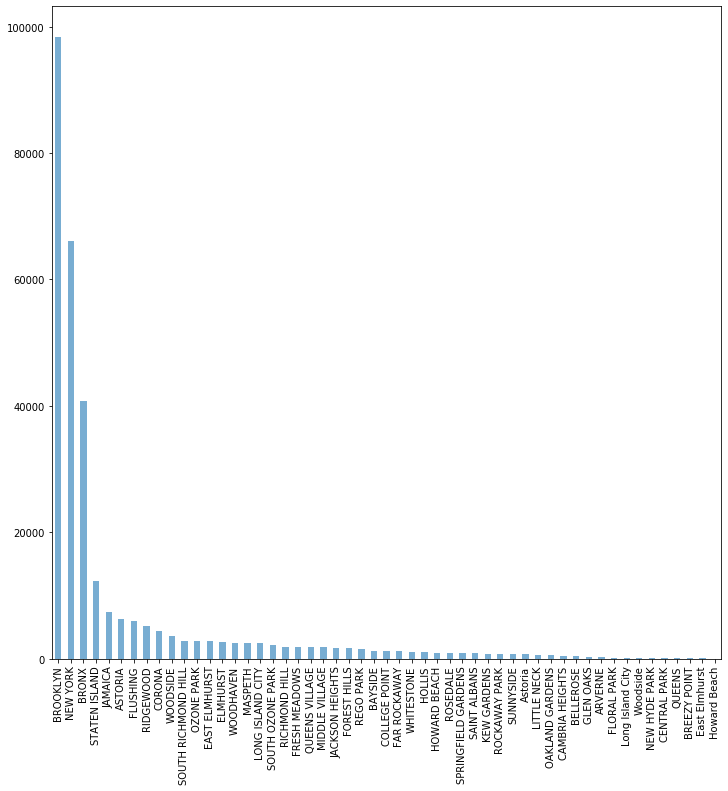

In [27]:
# Insight 4 ------> Create a bar plot to check which city registers most number of cases
df['City'].value_counts().plot(kind='bar',alpha=0.6,figsize=(12,12))
plt.show()

#### 3.4 Brooklyn City registers most of the complaints.

In [28]:
df_Brooklyn = df[df['City']=='BROOKLYN']

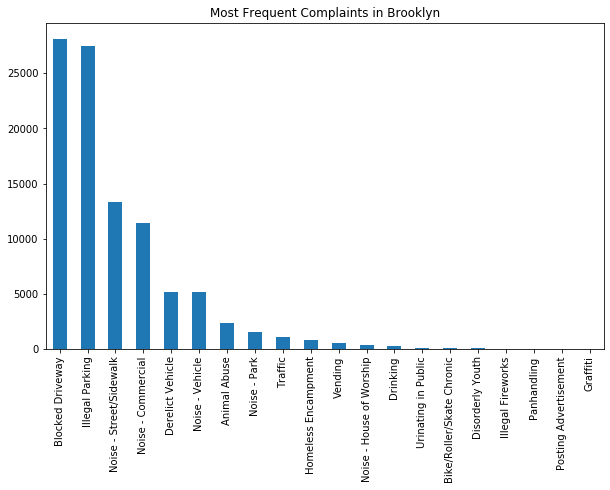

In [29]:
# Insight 5 ------> Create a bar plot to check which complain is most common in 'BROOKLYN'

(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

#### 3.5 Most Frequent Complaints in Brooklyn is Blocked Driveway

### 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [33]:
df['City'].dropna(inplace=True) # dropping null value rows

In [34]:
# Group them for City (location) first and Complain Type in that
df_nyc_grouped = df.groupby(['City', 'Complaint Type'])

In [35]:
df_nyc_grouped.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299347,30291030,2015-03-30 17:26:51,2015-03-30 23:19:03,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,11103.0,NaN,...,NaN,NaN,NaN,40.764590,-73.904513,"(40.76459027028896, -73.90451320724391)",05:52:12,5.87,Slow,Mar
299367,30293924,2015-03-30 17:00:20,2015-03-30 18:48:58,NYPD,New York City Police Department,Disorderly Youth,Playing in Unsuitable Place,Street/Sidewalk,11363.0,220 FOREST ROAD,...,NaN,NaN,NaN,40.773052,-73.749109,"(40.77305203079431, -73.7491087819053)",01:48:38,1.81,Fast,Mar
299397,30292605,2015-03-30 16:15:25,2015-03-30 23:17:00,NYPD,New York City Police Department,Graffiti,Police Report Requested,Residential Building/House,11106.0,32-86 34 STREET,...,NaN,NaN,NaN,40.760383,-73.923387,"(40.76038295135621, -73.92338726201558)",07:01:35,7.03,Very Slow,Mar
299483,30294663,2015-03-30 14:11:24,2015-03-30 17:21:05,NYPD,New York City Police Department,Graffiti,Police Report Requested,Store/Commercial,11377.0,34-39 56 STREET,...,NaN,NaN,NaN,40.752248,-73.905379,"(40.752247862227776, -73.90537908048168)",03:09:41,3.16,Acceptable,Mar


In [36]:
df_nyc_mean = df_nyc_grouped.mean()['Request_Closing_In_Hr']
df_nyc_mean.isnull().sum()

0

In [37]:
# Group by City(location) first and then Complain Type and showing average of Request Closing in Hour
df_nyc_grouped = df.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
df_nyc_grouped

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[764 rows x 1 columns]

In [38]:
df_nyc_sorted = df_nyc_grouped.sort_values(['City', 'Request_Closing_In_Hr'])
df_nyc_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[764 rows x 1 columns]

### 5. Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

1. Whether the average response time across complaint types is similar or not (overall)

2. Are the type of complaint or service requested and location related?


In [39]:
# Trying  ANOVA for  -- >  Whether the average response time across complaint types is similar or not (overall)

#  H0 : All Complain Types average response time mean is similar

#  H1 : Not similar



In [40]:
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [41]:
top5_complaints_type = df['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [42]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [43]:
sample_data = df.loc[df['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'Request_Closing_Time']]
sample_data.head()

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,00:55:15
1,Blocked Driveway,01:26:16
2,Blocked Driveway,04:51:31
3,Illegal Parking,07:45:14
4,Illegal Parking,03:27:02


In [44]:
sample_data.isnull().sum()

Complaint Type             0
Request_Closing_Time    2059
dtype: int64

In [45]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].Request_Closing_Time
s1.head()

1    01:26:16
2    04:51:31
7    01:47:55
9    01:23:02
10   07:48:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [46]:
import scipy.stats as stats
from math import sqrt

In [47]:
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].Request_Closing_Time
s2.head()

3   07:45:14
4   03:27:02
5   01:53:30
6   01:57:28
8   08:33:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [48]:
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].Request_Closing_Time
s3.head()

0    00:55:15
12   02:28:57
19   00:47:05
38   00:29:28
54   01:29:44
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [49]:
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_Time
s4.head()

17   00:51:08
18   02:56:01
22   01:15:42
29   02:29:59
30   01:59:09
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [50]:
 s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_Time
s5.head()

17   00:51:08
18   02:56:01
22   01:15:42
29   02:29:59
30   01:59:09
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [51]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())

234
829
536
330
330


In [52]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=94.67013793498374, pvalue=1.2783369279778672e-80)

### Since the p value < 0.5 , thereby rejecting null hypothesis i.e. All Complain Types average response time mean is not similar

In [53]:
#Try ChiSquare Test for second one - # Are the type of complaint or service requested and location related?

# H0 : 2 categories - Complain Type and Location is independent means not related

# H1 : 2 categories - Complain Type and Location is dependent means related

In [54]:
top5_location = df['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [55]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [56]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [57]:
sample_data_location_c_type = df.loc[(df['Complaint Type'].isin(top5_complaints_type_names)) & (df['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [58]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City'], margins=True)

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
All,33893,85610,5961,49720,10291,185475


In [59]:
pd.crosstab(df['Complaint Type'],df['City'], margins=True)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,...,942,1548,262,2142,206,208,1060,1613,11,76761
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,...,358,289,210,1766,10,227,308,247,2,17547
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,2,2,0,23,2,1,0,1,0,286
Drinking,1,35,0,1,1,1,188,257,0,0,...,13,23,6,175,10,2,3,15,0,1272
Graffiti,1,4,0,3,0,0,9,43,0,0,...,0,0,0,2,1,1,0,3,0,113
Homeless Encampment,4,32,0,2,1,0,247,857,5,0,...,4,11,5,71,11,0,9,33,0,4415


In [60]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))

In [61]:
print(ch2)
print(p_value)

40522.79928349593
0.0


### We can see pvalue is less than 0.05 so we reject null hypothesis which means complain type and location is dependent.